<a href="https://colab.research.google.com/github/ameympatil/MIT-ML/blob/main/Keras_Practical_using_Functional_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Functional API

In [55]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.models import Model
from keras.layers import Input, Dense, Dropout

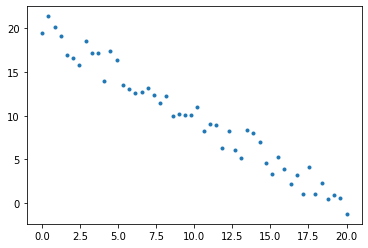

In [56]:
# Define random seed
np.random.seed(42)

# Create random points for the x and y axis from 0 to 20
xs = np.linspace(0,20,50)
ys = np.linspace(20,0,50)

# Add some positive and negative noise on the y axis
ys += np.random.uniform(-2,2,50)

# Plot the graph
plt.plot(xs,ys,'.')

In [57]:
# Create the input layer
input_layer = Input(shape=(1, ))

# Create the other hidden layers and the output layer
hidden_1 = Dense(64, activation='relu')(input_layer)
hidden_2 = Dense(32, activation='relu')(hidden_1)
output = Dense(1, activation='linear')(hidden_2)

In [58]:
model = Model(inputs=input_layer, outputs=output)

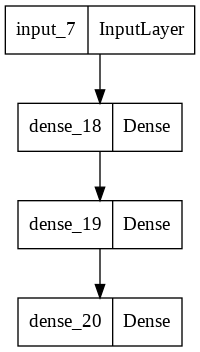

In [59]:
from keras.utils.vis_utils import plot_model

plot_model(model)

In [60]:
model.compile(optimizer='adam',loss = 'mae')

In [61]:
model.fit(xs,ys,epochs=200,batch_size=64)

Epoch 1/200
1/1 [==============================] - 1s 717ms/step - loss: 9.8201
Epoch 2/200
1/1 [==============================] - 0s 11ms/step - loss: 9.5421
Epoch 3/200
1/1 [==============================] - 0s 8ms/step - loss: 9.3225
Epoch 4/200
1/1 [==============================] - 0s 7ms/step - loss: 9.1555
Epoch 5/200
1/1 [==============================] - 0s 10ms/step - loss: 8.9886
Epoch 6/200
1/1 [==============================] - 0s 14ms/step - loss: 8.8592
Epoch 7/200
1/1 [==============================] - 0s 8ms/step - loss: 8.7461
Epoch 8/200
1/1 [==============================] - 0s 26ms/step - loss: 8.6414
Epoch 9/200
1/1 [==============================] - 0s 10ms/step - loss: 8.5557
Epoch 10/200
1/1 [==============================] - 0s 16ms/step - loss: 8.5033
Epoch 11/200
1/1 [==============================] - 0s 7ms/step - loss: 8.4636
Epoch 12/200
1/1 [==============================] - 0s 10ms/step - loss: 8.4263
Epoch 13/200
1/1 [==============================] - 

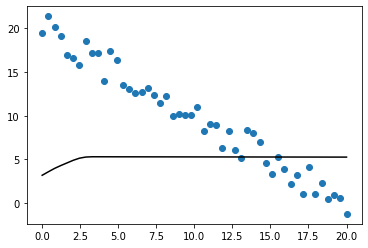

In [62]:
# model makes prediction
y_pred = model.predict(xs)

# plot the graph
plt.plot(xs,y_pred,'k',label='Predicted')
plt.scatter(xs,ys,label=True)